In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
ds=pd.read_csv("mnist_train.csv")

In [3]:
ds

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y=ds["label"]

In [5]:
y.shape

(42000,)

In [6]:
del ds["label"]

In [7]:
ds.shape

(42000, 784)

0


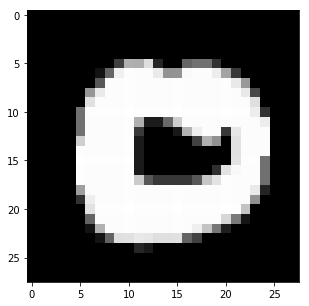

In [8]:
plt.figure(figsize=(5,5))
grid=ds.iloc[1253].values.reshape(28,28)
plt.imshow(grid,cmap="gray")
print(y.iloc[1253])

In [9]:
x=ds

In [10]:
samp_x=x.head(15000)
samp_y=y.head(15000)

In [11]:
from sklearn.preprocessing import StandardScaler as sc

In [12]:
ss=sc()

In [13]:
data=ss.fit_transform(samp_x)

/home/anonymous/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/anonymous/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
from sklearn.decomposition import PCA 

In [16]:
pca=PCA(n_components=2)

In [17]:
pca_data=pca.fit_transform(data)

In [18]:
pca_data.shape

(15000, 2)

In [19]:
pca_data

array([[-5.04359168, -5.55779873],
       [19.30520856,  6.19439847],
       [-7.67880093, -1.90986955],
       ...,
       [-1.50728305, -2.14759871],
       [-6.53727874,  3.20386284],
       [-1.25634332, -6.87765437]])

In [20]:
pca_data = np.vstack((pca_data.T, samp_y)).T

In [31]:
pca_data

array([[-5.04359168, -5.55779873,  1.        ],
       [19.30520856,  6.19439847,  0.        ],
       [-7.67880093, -1.90986955,  1.        ],
       ...,
       [-1.50728305, -2.14759871,  8.        ],
       [-6.53727874,  3.20386284,  9.        ],
       [-1.25634332, -6.87765437,  6.        ]])

In [32]:
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))

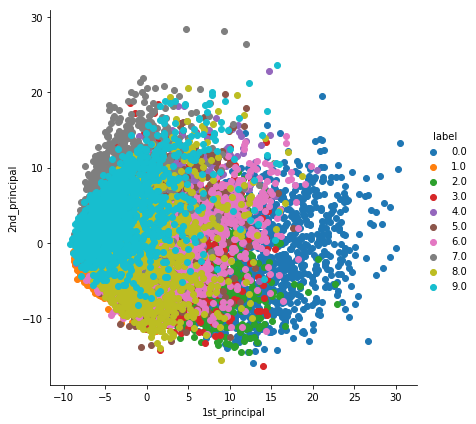

In [35]:
sns.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [37]:
pca.explained_variance_ratio_

array([0.05912341, 0.04251172])

In [51]:
pca.n_components=500
pca_data=pca.fit_transform(samp_x)
var_exp=pca.explained_variance_/np.sum(pca.explained_variance_)

cumsum=np.cumsum(var_exp)

Text(0, 0.5, 'pca_exp_var')

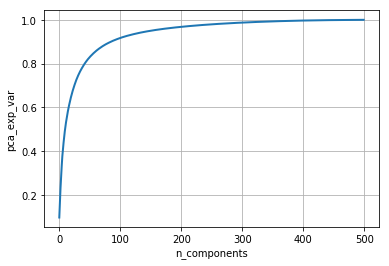

In [58]:
plt.grid()
plt.plot(cumsum,linewidth=2)
plt.xlabel("n_components")
plt.ylabel("pca_exp_var")

In [59]:
#upto the 200dim , 90% varience is explained